In [2]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 11s 2us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape


(60000, 28, 28)

In [8]:
len(train_labels)


60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

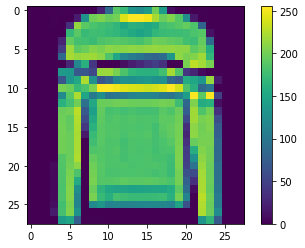

In [14]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

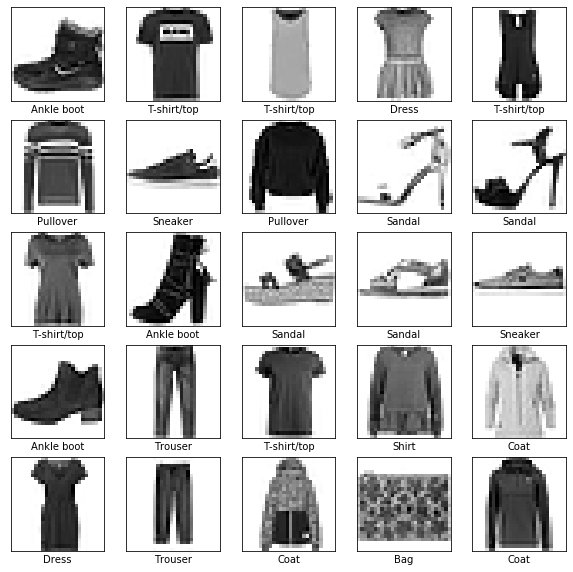

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
#La primera capa Dense tiene 128 nodos (o neuronas)
#capa es una capa de 10 nodos softmax que devuelve un arreglo de 10 probabilidades que suman a 1.
#la ultima es de pertenencia
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [21]:
#Loss function —Esto mide que tan exacto es el modelo durante el entrenamiento
#Optimizer — Esto es como el modelo se actualiza basado en el set de datos que ve
#Metrics — Se usan para monitorear los pasos de entrenamiento y de pruebas.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
#Entregue los datos de entrenamiento al modelo
#el modelo aprende a asociar imagenes y etiquetas
#Usted le pregunta al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.4986 - acc: 0.8243
Epoch 2/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3762 - acc: 0.8643
Epoch 3/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3363 - acc: 0.8779
Epoch 4/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3109 - acc: 0.8846
Epoch 5/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2950 - acc: 0.8914
Epoch 6/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2819 - acc: 0.8960
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2679 - acc: 0.9006
Epoch 8/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2585 - acc: 0.9032
Epoch 9/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2475 - acc: 0.9083
Epoch 10/10
60000/60000 [==============================] - 4s 72us/sample - loss:

In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3402 - acc: 0.8799

Test accuracy: 0.8799


In [24]:
predictions = model.predict(test_images)

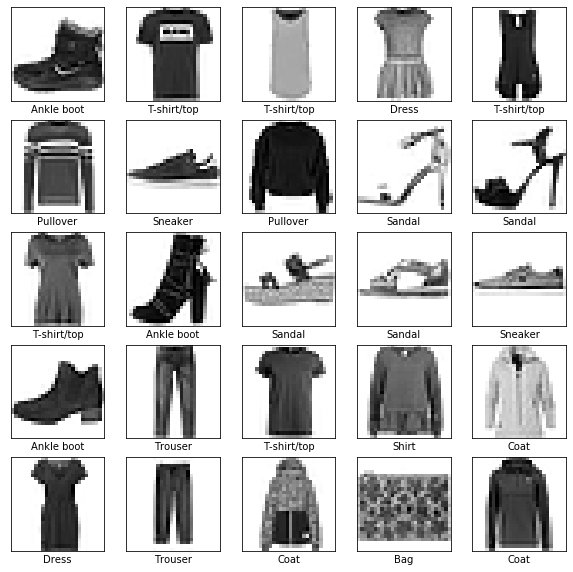

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [29]:
predictions[0]

array([9.3633668e-07, 2.9147556e-11, 6.1923970e-07, 2.5859915e-08,
       9.3160430e-09, 2.7202789e-03, 5.8305488e-07, 1.0960043e-02,
       7.4599413e-08, 9.8631740e-01], dtype=float32)

In [30]:
np.argmax(predictions[0])

9

In [31]:
test_labels[0]

9

In [32]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

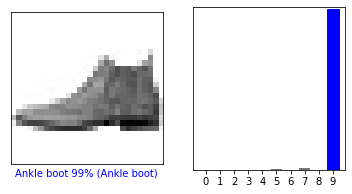

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

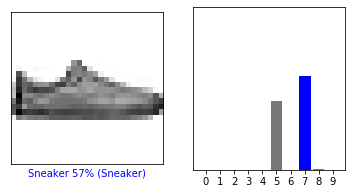

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

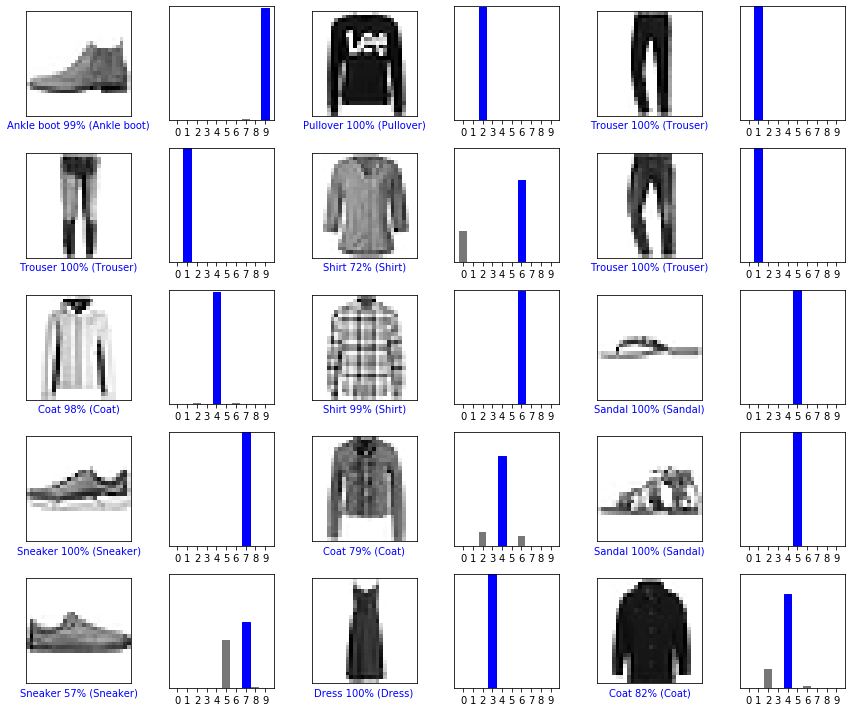

In [35]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [36]:
img = test_images[1]

print(img.shape)

(28, 28)


In [37]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [38]:
predictions_single = model.predict(img)

print(predictions_single)

[[9.7711643e-05 2.1234030e-14 9.9790049e-01 6.5705700e-12 8.4754248e-04
  1.0541700e-11 1.1542473e-03 2.5106653e-11 1.6843757e-11 2.9429336e-15]]


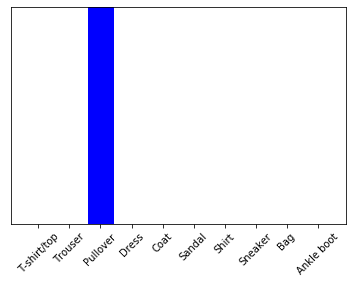

In [39]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [40]:
#Prediccion
np.argmax(predictions_single[0])

2